In [2]:
import pandas as pd
import seaborn as sns

# Importando Base de Dados

In [3]:
data= pd.read_csv('tips.csv', sep=',')

In [4]:
data.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Alterar os nomes e valores para português

## Alterando labels

In [5]:
rename={'total_bill':'conta_total',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia',
    'time':'horario',
    'size':'clientes'}

data.rename(inplace=True, columns=rename)

In [6]:
data.head()

,conta_total,gorjeta,sobremesa,dia,horario,clientes
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Transformando os dados sobremesa em verdadeiramente booleanos

In [7]:
data['sobremesa'] == 'Yes'
data.sobremesa = data['sobremesa'] == 'Yes' 

In [8]:
data.dia.unique()
sup= {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}
data.dia= data.dia.map(sup) 

In [9]:
data.horario.unique()
sup= {
    'Dinner':'Janta',
    'Lunch':'Almoço'
}
data.horario=data.horario.map(sup)

In [10]:
data

,conta_total,gorjeta,sobremesa,dia,horario,clientes
0,16.99,1.01,False,Domingo,Janta,2
1,10.34,1.66,False,Domingo,Janta,3
2,21.01,3.50,False,Domingo,Janta,3
3,23.68,3.31,False,Domingo,Janta,2
4,24.59,3.61,False,Domingo,Janta,4
...,...,...,...,...,...,...
239,29.03,5.92,False,Sábado,Janta,3
240,27.18,2.00,True,Sábado,Janta,2
241,22.67,2.00,True,Sábado,Janta,2
242,17.82,1.75,False,Sábado,Janta,2


# Análise I -> Valor da conta e gorjeta

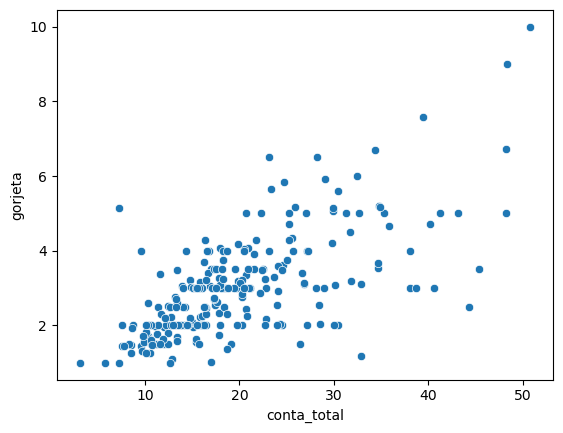

In [11]:
graf_valor_gorjeta=sns.scatterplot(x='conta_total', y='gorjeta', data=data)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [12]:
print('A base de dados contém {} registros \n'.format(data.shape[0]))
print('Registros não nulos:')
data.count()

A base de dados contém 244 registros 

Registros não nulos:


conta_total    244
gorjeta        244
sobremesa      244
dia            244
horario        244
clientes       244
dtype: int64

## Campo porcentagens

In [13]:
data.head(1)

,conta_total,gorjeta,sobremesa,dia,horario,clientes
0,16.99,1.01,False,Domingo,Janta,2


In [14]:
data['porcentagem']=data['gorjeta']/data['conta_total'].round(4)

In [15]:
data['porcentagem']=data['porcentagem'].round(4)
data.head(1)

,conta_total,gorjeta,sobremesa,dia,horario,clientes,porcentagem
0,16.99,1.01,False,Domingo,Janta,2,0.0594


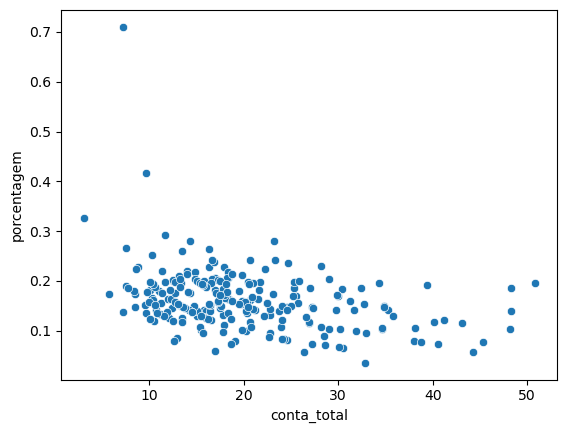

In [16]:
porcentagem_conta= sns.scatterplot(x='conta_total',y='porcentagem', data=data)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

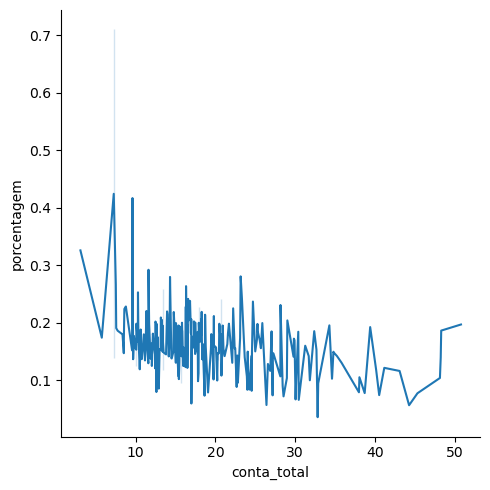

In [17]:
porcentagem_conta_linha= sns.relplot(x='conta_total', y='porcentagem', kind='line', data=data)

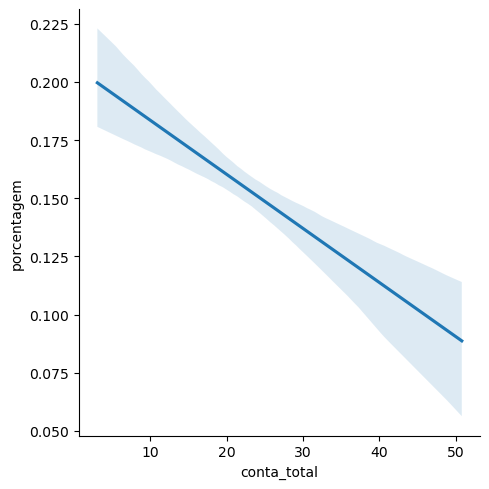

In [18]:
sns.lmplot(x='conta_total',y='porcentagem', data=data, scatter=False)

# Análise || - Sobremesa

In [19]:
data.head(1)

,conta_total,gorjeta,sobremesa,dia,horario,clientes,porcentagem
0,16.99,1.01,False,Domingo,Janta,2,0.0594


In [20]:
data[data['sobremesa']==True].describe()['gorjeta']

count    93.000000
mean      3.008710
std       1.401468
min       1.000000
25%       2.000000
50%       3.000000
75%       3.680000
max      10.000000
Name: gorjeta, dtype: float64

In [21]:
data[data['sobremesa']==False].describe()['gorjeta']

count    151.000000
mean       2.991854
std        1.377190
min        1.000000
25%        2.000000
50%        2.740000
75%        3.505000
max        9.000000
Name: gorjeta, dtype: float64

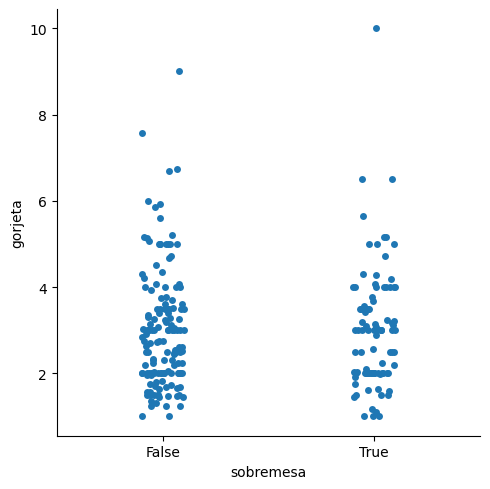

In [22]:
sns.catplot(x='sobremesa', y='gorjeta', data=data) #Grafico categórico


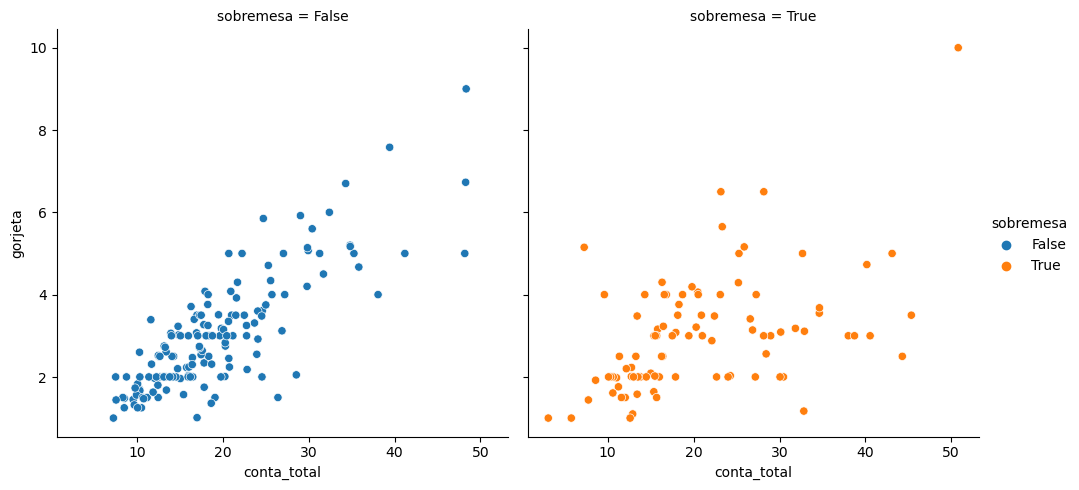

In [23]:
sns.relplot(x='conta_total', y='gorjeta', data=data, hue='sobremesa', col='sobremesa')

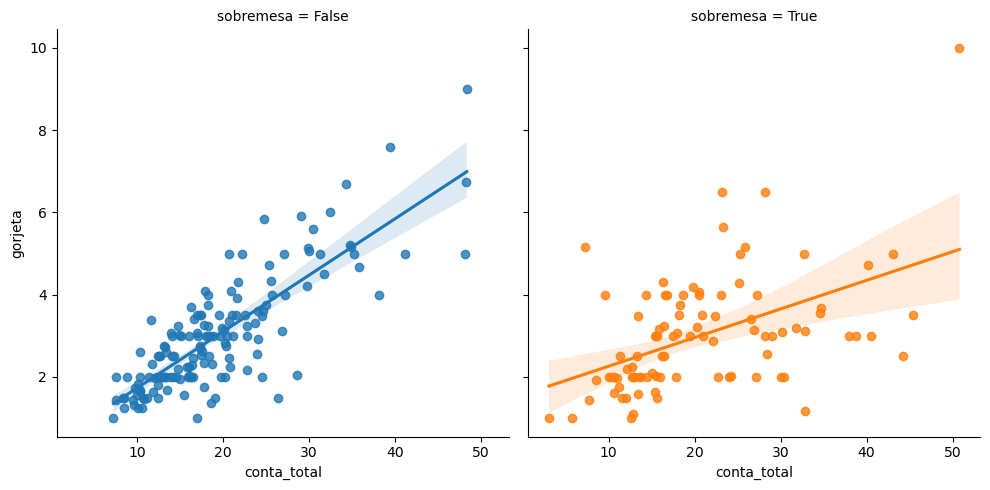

In [24]:
sns.lmplot(x='conta_total', y='gorjeta', col='sobremesa',hue='sobremesa', data=data)

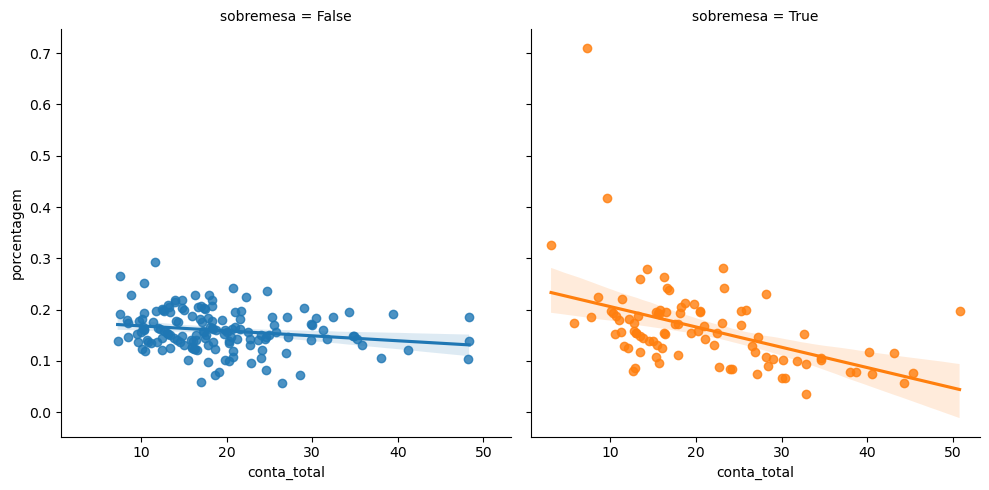

In [34]:
sns.lmplot(x='conta_total', y='porcentagem', col='sobremesa',hue='sobremesa', data=data)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

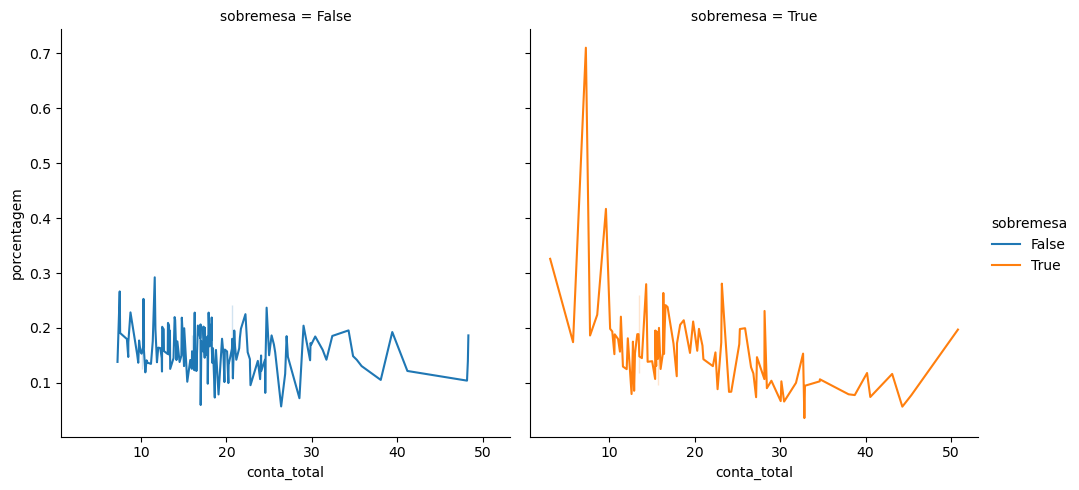

In [36]:
sns.relplot(x='conta_total', y='porcentagem', col='sobremesa',hue='sobremesa', data=data, kind="line")

## Teste de hipótese 

**H<sup>null</sup>**
> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [40]:
from scipy.stats import ranksums

In [44]:
data.head()

,conta_total,gorjeta,sobremesa,dia,horario,clientes,porcentagem
0,16.99,1.01,False,Domingo,Janta,2,0.0594
1,10.34,1.66,False,Domingo,Janta,3,0.1605
2,21.01,3.50,False,Domingo,Janta,3,0.1666
3,23.68,3.31,False,Domingo,Janta,2,0.1398
4,24.59,3.61,False,Domingo,Janta,4,0.1468


In [47]:
sobremesa_query=data.query("sobremesa==True").porcentagem
n_sobremesa_query=data.query("sobremesa==False").porcentagem

In [52]:
r=ranksums(sobremesa_query, n_sobremesa_query)

In [55]:
# matemáticamente essa diferença é insignificante
# PValue < 0.05 == Halt

print('O valor do p-value é {}'.format(r.pvalue.round(6)))

O valor do p-value é 0.55885


# Análise 3 - Dia da Semana

In [58]:
data.head()

,conta_total,gorjeta,sobremesa,dia,horario,clientes,porcentagem
0,16.99,1.01,False,Domingo,Janta,2,0.0594
1,10.34,1.66,False,Domingo,Janta,3,0.1605
2,21.01,3.50,False,Domingo,Janta,3,0.1666
3,23.68,3.31,False,Domingo,Janta,2,0.1398
4,24.59,3.61,False,Domingo,Janta,4,0.1468


In [60]:
data.dia.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

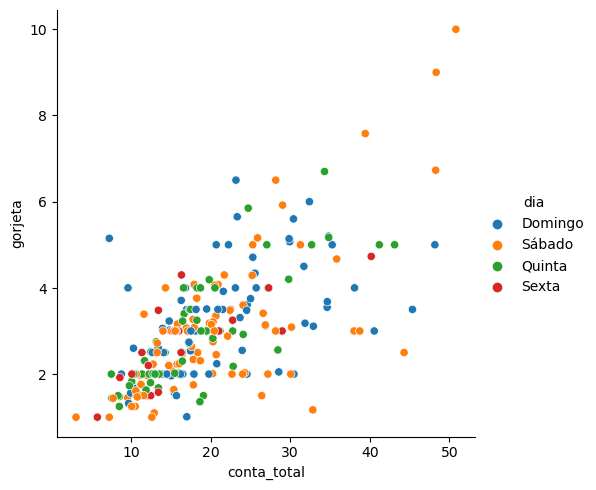

In [66]:
sns.relplot(x='conta_total', y='gorjeta', hue='dia', data=data)

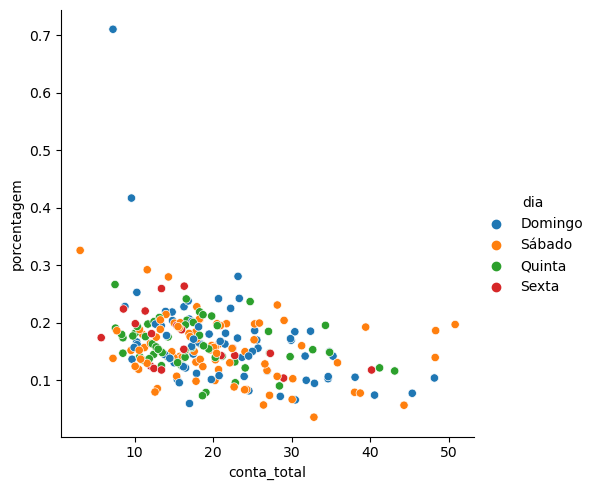

In [69]:
sns.relplot(x='conta_total', y='porcentagem', hue='dia', data=data)

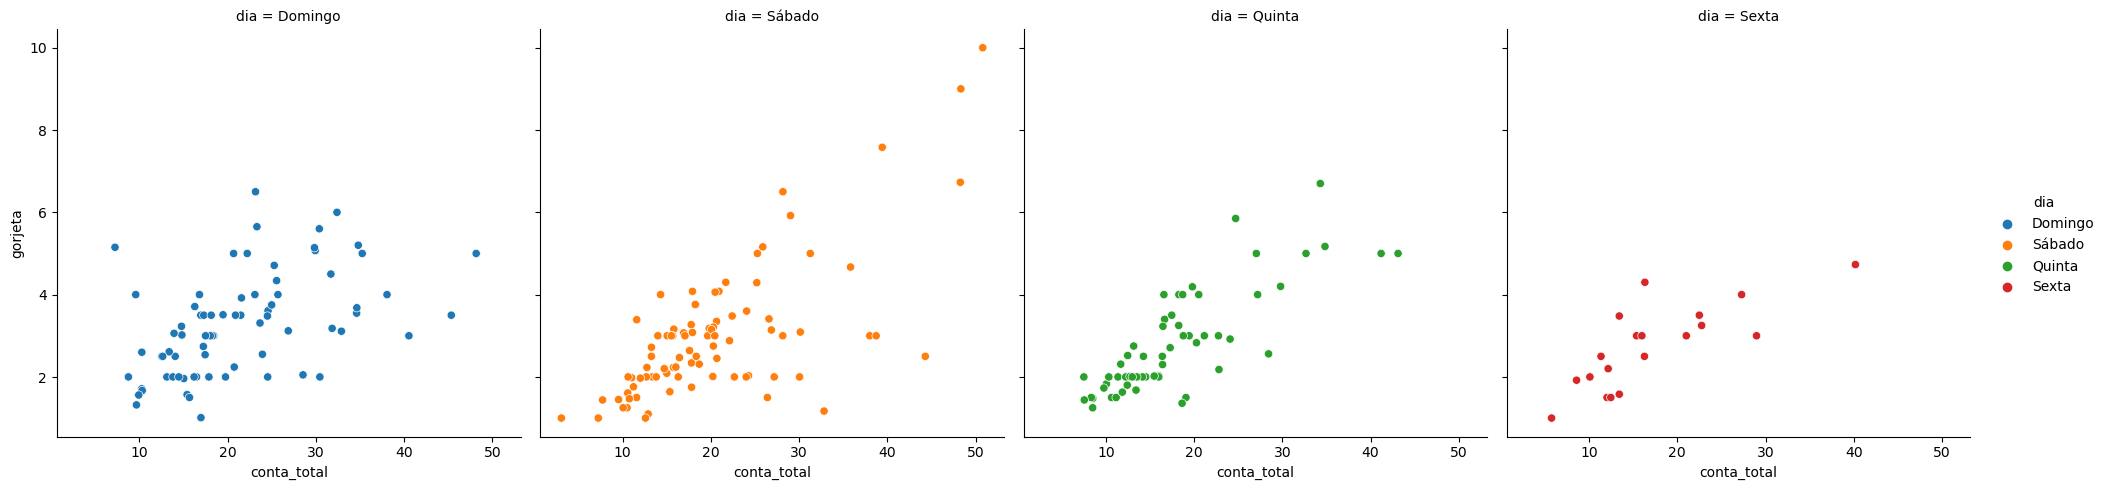

In [71]:
sns.relplot(x='conta_total', y='gorjeta', hue='dia', col='dia', data=data)

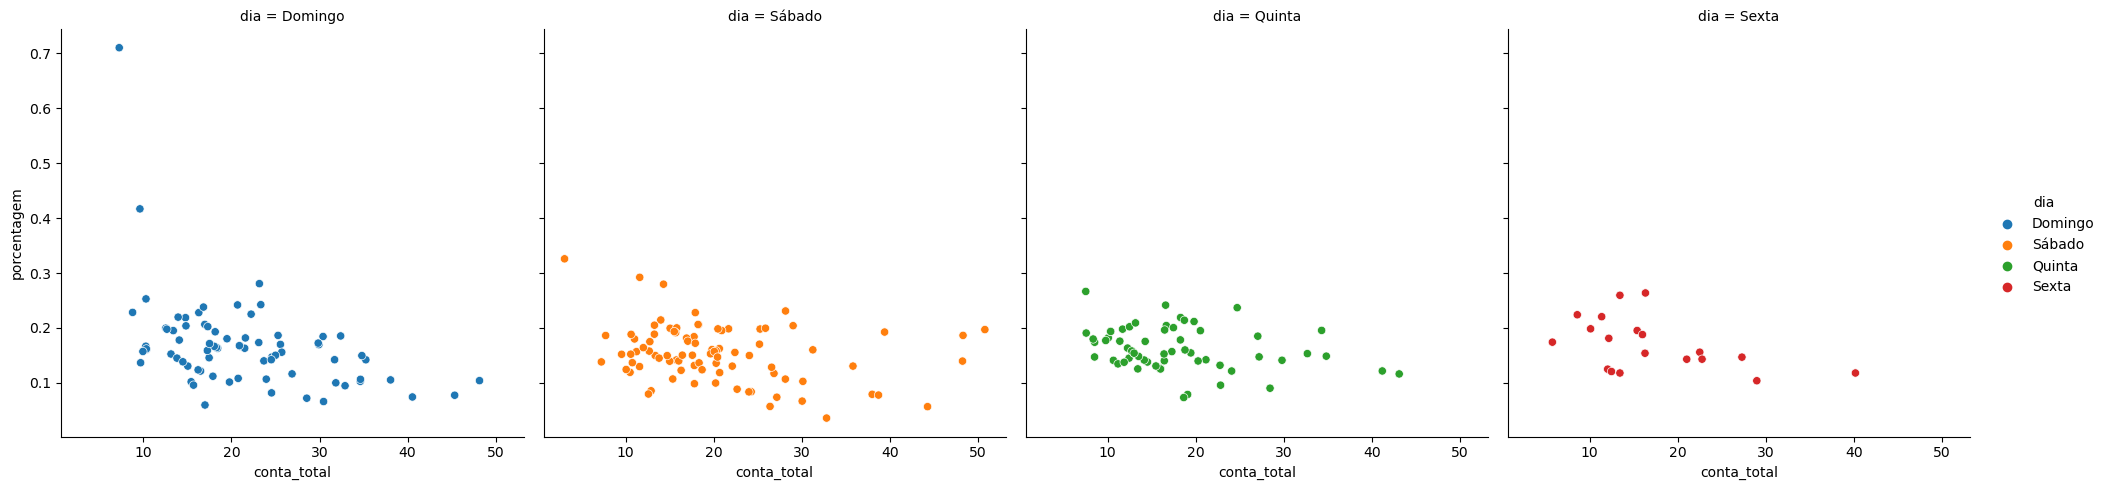

In [73]:
sns.relplot(x='conta_total', y='porcentagem', hue='dia', col='dia', data=data)

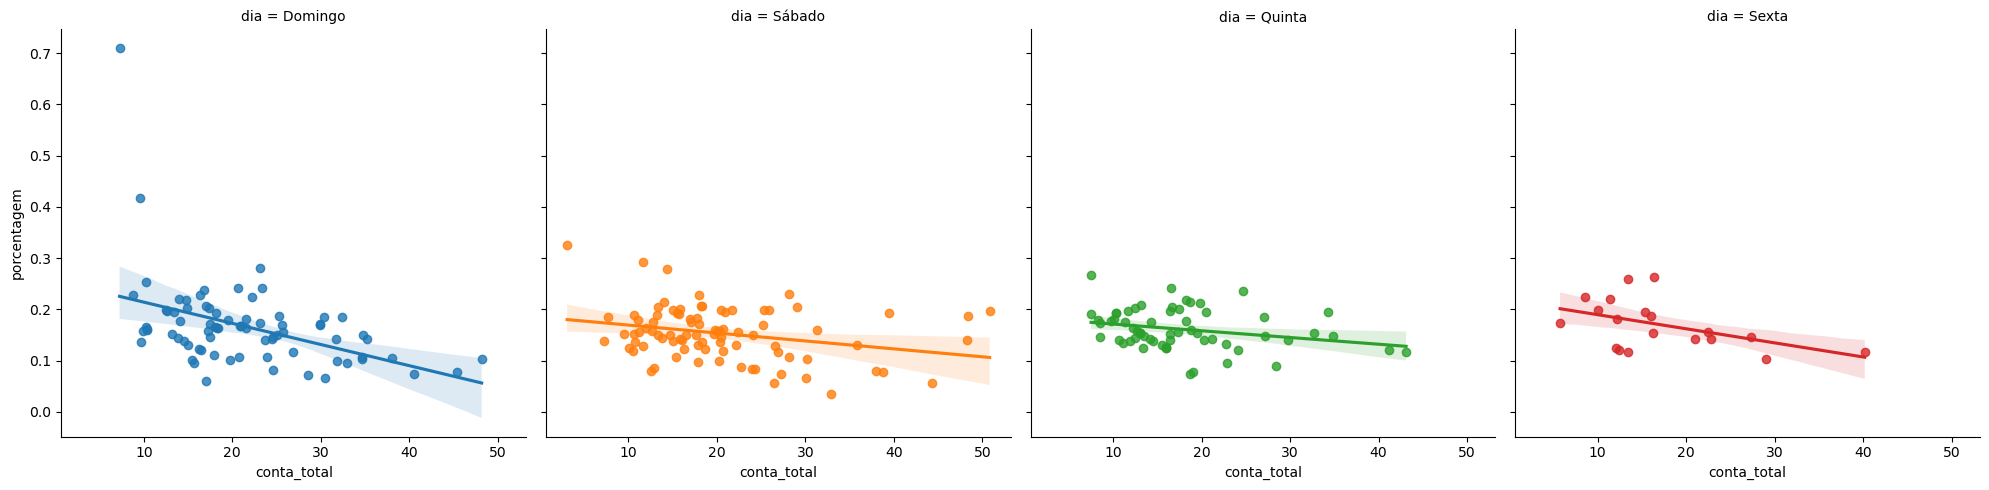

In [76]:
sns.lmplot(x='conta_total', y='porcentagem', hue='dia', col='dia', data=data)

In [89]:
media_geral_gorjeta=data.gorjeta.mean()
print(' A média geral das gorjetas é de: {}'.format(media_geral_gorjeta))

data.groupby(['dia']).mean()[['conta_total', 'gorjeta', 'porcentagem']]

 A média geral das gorjetas é de: 2.9982786885245902


,conta_total,gorjeta,porcentagem
dia,,,
Domingo,21.410000,3.255132,0.166896
Quinta,17.682742,2.771452,0.161265
Sexta,17.151579,2.734737,0.169916
Sábado,20.441379,2.993103,0.153146


In [96]:
print('frequência dos dias:')
data.dia.value_counts()

frequência dos dias:


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia, dtype: int64

In [97]:
# Teste de Hipótese

**h<sup>null</sup>**
> **A distribuição do valor da conta é igual no sábado e no domingo**

**h<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no sábado e no domingo**

In [105]:
conta_domingo=data.query('dia == "Domingo" ').conta_total
conta_sabado=data.query('dia == "Sábado" ').conta_total

In [111]:
r2 = ranksums(conta_domingo, conta_sabado)
# Já que o valor de P-value > 0.05, aceitamos a hipótese nula
print(' O valor do P-Value é {}'.format(r2.pvalue.round(6)))

 O valor do P-Value é 0.357673


In [113]:
data.head()

,conta_total,gorjeta,sobremesa,dia,horario,clientes,porcentagem
0,16.99,1.01,False,Domingo,Janta,2,0.0594
1,10.34,1.66,False,Domingo,Janta,3,0.1605
2,21.01,3.50,False,Domingo,Janta,3,0.1666
3,23.68,3.31,False,Domingo,Janta,2,0.1398
4,24.59,3.61,False,Domingo,Janta,4,0.1468


In [115]:
data.horario.unique()

array(['Janta', 'Almoço'], dtype=object)

# Análise 4 - Hora do dia

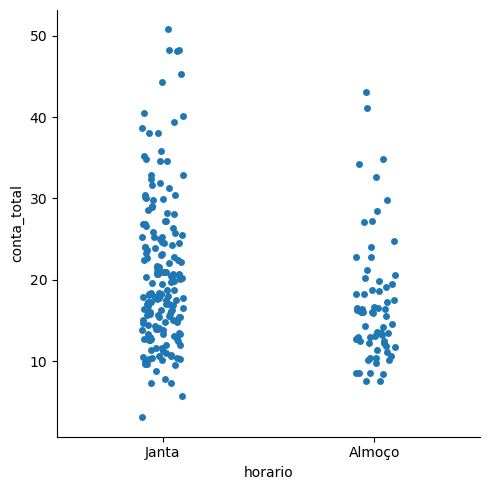

In [118]:
sns.catplot(x='horario', y='conta_total', data=data)

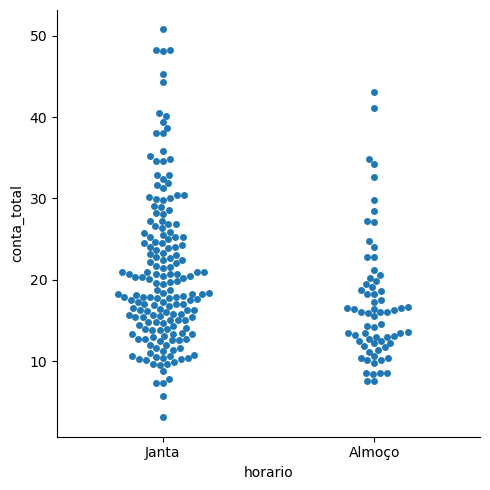

In [120]:
sns.catplot(x='horario', y='conta_total', kind='swarm', data=data)

<Axes: xlabel='horario', ylabel='conta_total'>

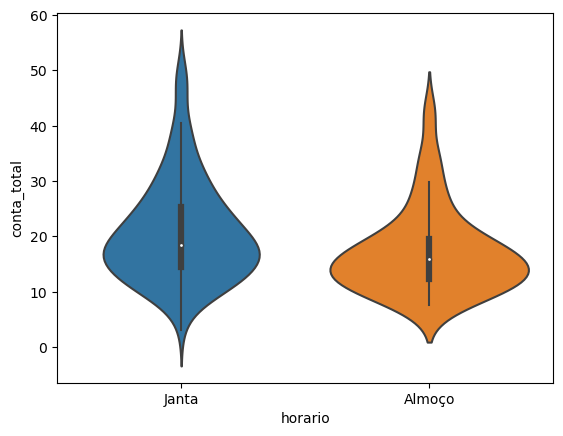

In [122]:
sns.violinplot(x='horario', y='conta_total', data=data)

<Axes: xlabel='horario', ylabel='conta_total'>

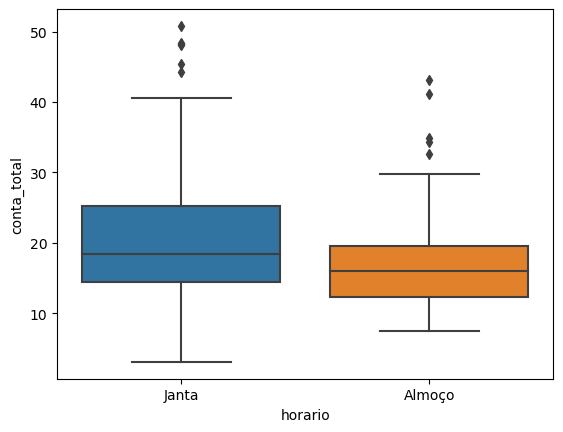

In [124]:
sns.boxplot(x='horario', y='conta_total', data=data)

<Axes: xlabel='conta_total', ylabel='Count'>

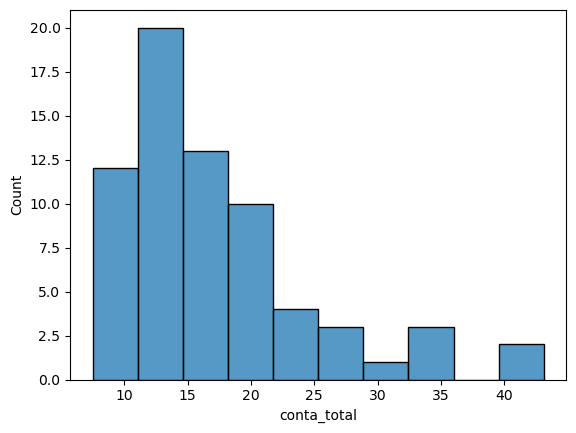

In [133]:
almoco=data.query("horario == 'Almoço'").conta_total
sns.histplot(almoco)

<Axes: xlabel='conta_total', ylabel='Count'>

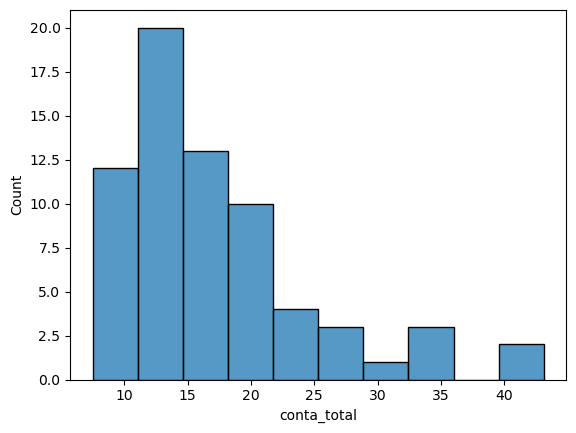

In [136]:
sns.histplot(almoco, kde=False)

<Axes: xlabel='conta_total', ylabel='Count'>

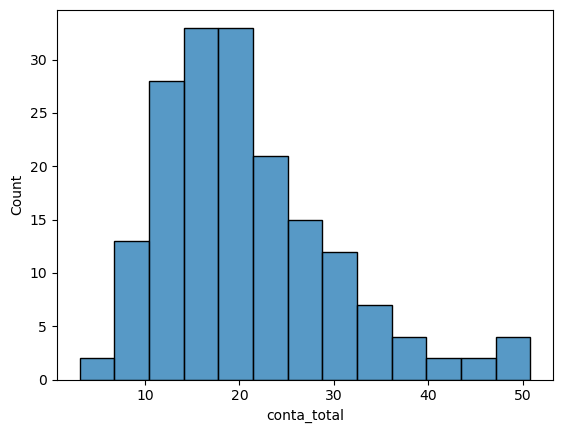

In [139]:
janta=data.query("horario == 'Janta'").conta_total
sns.histplot(janta)

In [142]:
data.groupby(['horario']).mean()[['conta_total', 'gorjeta', 'porcentagem']]

,conta_total,gorjeta,porcentagem
horario,,,
Almoço,17.168676,2.728088,0.164118
Janta,20.797159,3.102670,0.159515


## Teste de Hipótese

**h<sup>null</sup>**
> **A distribuição do valor da conta é igual no jantar e no almoco**

**h<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoco**

In [148]:
r3 =ranksums(janta, almoco)
print('O valor do P-Value é de {}'.format(r3.pvalue))

O valor do P-Value é de 0.0011791039723641672


**h<sup>alt</sup>**
> **A distribuição do valor da conta não é igual no jantar e no almoco**

## Teste de Hipótese 2

**h<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoco**

**h<sup>alt</sup>**
> **A distribuição da taxa da gorjeta não é igual no jantar e no almoco**

In [151]:
porcentagem_almoco=data.query("horario  == 'Almoço'").porcentagem

In [154]:
porcentagem_jantar=data.query("horario  == 'Janta'").porcentagem

In [160]:
r4=ranksums(porcentagem_almoco, porcentagem_jantar)

In [161]:
print('O valor do P-Value é de {}'.format(r4.pvalue))

O valor do P-Value é de 0.22831951519679017


**h<sup>null</sup>**
> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**